# Biostat 257 Homework 1

#### Due Apr 17 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2020-spring` and add `Hua-Zhou` and `BrendonChau` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

## Q2 Solution

In [44]:
# 1. Associative rule for addition says (x + y) + z == x + (y + z). 
# Check association rule using x = 0.1, y = 0.1 and z = 1.0 in Julia. Explain what you find.
x = 0.1; y = 0.1; z = 1.0
@show (x + y) + z == x + (y + z)
@show (x + y) + z
@show x + (y + z)

(x + y) + z == x + (y + z) = false
(x + y) + z = 1.2
x + (y + z) = 1.2000000000000002


1.2000000000000002

In [ ]:
Expressing decimal numbers as floating points can introduce rounding errors.

Expressing decimal numbers asloating points can introduce rounding errors.

In [106]:
# 2. Do floating-point numbers obey the associative rule for multiplication: (x * y) * z == x * (y * z)?
x = 0.6
y = 0.66
z = 3.1415926535
@show (x * y) * z == x * (y * z)

(x * y) * z == x * (y * z) = false


false

In [113]:
# 3. Do floating-point numbers obey the distributive rule: a * (x + y) == a * x + a * y?
a = 0.6
x = 0.66
y = 3.1415926535
@show a * (x + y) == a * x + a * y

a * (x + y) == a * x + a * y = false


false

In [128]:
# 4. Is 0 * x == 0 true for all floating-point number x?
@show Inf64 * 0 == 0
@show 1492 * 0 == 0

Inf64 * 0 == 0 = false
1492 * 0 == 0 = true


true

In [135]:
###### 5. Is x / a == x * (1 / a) always true?
x = 0.6
a = .1
@show x / a
@show x * (1 / a)
@show x / a
@show x * (1 / a)

x / a = 5.999999999999999
x * (1 / a) = 6.0
x / a = 5.999999999999999
x * (1 / a) = 6.0


6.0

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

## Q3 Solution

In [144]:
#1. 
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
@code_llvm g(4)


;  @ In[144]:3 within `g'
define i64 @julia_g_19996(i64) {
top:
;  @ In[144]:4 within `g'
; ┌ @ int.jl:54 within `*'
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:52 within `-'
   %2 = add i64 %1, -2441406
; └
;  @ In[144]:6 within `g'
  ret i64 %2
}


In [139]:
#2. Use @code_llvm to find the LLVM bitcode of compiled g with Float64 input
@code_llvm g(4.5)


;  @ In[138]:2 within `g'
define double @julia_g_19944(double) {
top:
;  @ In[138]:3 within `g'
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:312 within `*' @ float.jl:405
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:313 within `-' @ float.jl:403
   %10 = fadd double %9, -1.000000e+00
;

There's more bitcode generated with Float64 input compared to the Int64 input. IEEE standard representation of floating point numbers means there will be more compution with floats to handle the extended precision.

In [145]:
#4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

@code_llvm g_fastmath(4)


;  @ In[145]:3 within `g_fastmath'
define i64 @julia_g_fastmath_19997(i64) {
top:
;  @ In[145]:4 within `g_fastmath'
; ┌ @ fastmath.jl:266 within `mul_fast'
; │┌ @ int.jl:54 within `*'
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:266 within `sub_fast'
; │┌ @ int.jl:52 within `-'
    %2 = add i64 %1, -2441406
; └└
;  @ In[145]:6 within `g_fastmath'
  ret i64 %2
}


In [143]:
@code_llvm g_fastmath(4.5)


;  @ In[142]:3 within `g_fastmath'
define double @julia_g_fastmath_19995(double) {
top:
;  @ In[142]:4 within `g_fastmath'
; ┌ @ fastmath.jl:263 within `mul_fast' @ fastmath.jl:163
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:263 within `sub_fast' @ fastmath.jl:162
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[142]:6 within `g_fastmath'
  ret double %2
}


Now there's the same number of lines of bitcode generated for both types.


## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.

## Q4 Solution

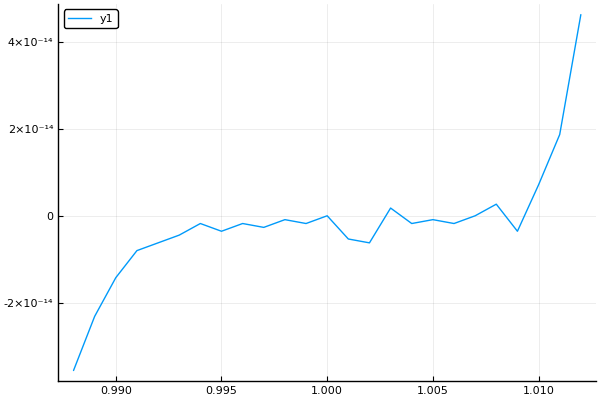

In [30]:
using Plots
pyplot()
x = Vector(0.988:0.001:1.012)
y = zeros(length(x))
for i in 1:length(x)
    y[i] = x[i]^7 - 7x[i]^6 + 21x[i]^5 - 35x[i]^4 + 35x[i]^3 - 21x[i]^2 + 7x[i] - 1
end
plot(x,y)

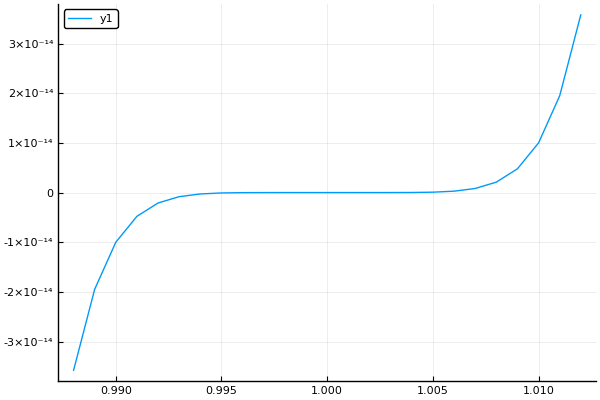

In [31]:
for i in 1:length(x)
    y[i] = (x[i] - 1)^7
end
plot(x,y)

By expanding the $7^{th}$ degree polynomial, we're introducing additional arithmetic operations. This gives more rounding errors.

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

## Q5 Solution

1. This is a special case of part 3, which I've shown below -- just let $\mathbf{U}=\mathbf{u}$, $\mathbf{V}^\top=\mathbf{u}^\top$, and $\mathbf{B}=\mathbf{I}$.

2. This is another special case of part 3: take $\mathbf{B}=\mathbf{I}$.

3. I'll first left-multiply by $(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^\top)$ to get

> $$
\begin{align*}
(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^\top)(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^\top)^{-1}=\mathbf{I}&= (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^\top \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^\top \mathbf{A}^{-1})\\
&=\ I-\mathbf{U}(\underline{\mathbf{B}^{-1}+\mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top \mathbf{A}^{-1}}\\
&\qquad\qquad + \mathbf{UB}\mathbf{V}^\top\mathbf{A}^{-1}-\mathbf{U}\mathbf{B}\mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U}(\underline{\mathbf{B}^{-1}+\mathbf{V}^{\top}\mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top\mathbf{A}^{-1}}
\end{align*}
$$
> Factoring out the underlined term on the right gives
> $$
\begin{align*}
\mathbf{I}&=\mathbf{I}-(\mathbf{U}-\mathbf{UB}\mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})(\mathbf{B}^{-1}+\mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top\mathbf{A}+\mathbf{U}\mathbf{B}\mathbf{V}^\top\mathbf{A}^{-1}
\end{align*}
$$
> Cleverly factoring out a $\mathbf{B}$,
$$
\begin{align*}
&=\mathbf{I}-\mathbf{UB}(\mathbf{B}^{-1}-\mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})(\mathbf{B}^{-1}+\mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top\mathbf{A}+\mathbf{U}\mathbf{B}\mathbf{V}^\top\mathbf{A}^{-1}\\
&=\mathbf{I}-\mathbf{UB}\mathbf{V}^\top \mathbf{A}+\mathbf{UB}\mathbf{V}^\top\mathbf{A}\\
&=\mathbf{I}
\end{align*}  
$$
> Then if I transpose this argument, I can see that this also holds for the right-multiplication. This shows the identity is true.

4. 
> From the the Binomial Inversion Formula<sup>TM</sup>, 
$$
\begin{align*}
(\mathbf{A} + \mathbf{UV}^\top)^{-1} &= \mathbf{A}^{-1} - \mathbf{A}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{V}^\top \mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top \mathbf{A}^{-1}\\
&= \mathbf{A}^{-1}(\mathbf{I} - \mathbf{U}(\mathbf{I} + \mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top\mathbf{A}^{-1})
\end{align*}  
$$
Let $\mathbf{C} = \mathbf{U}$ and $\mathbf{D} = \mathbf{V}^\top\mathbf{A}^{-1}$ and using $(\mathbf{I} + \mathbf{CD})^{-1} = \mathbf{I} - \mathbf{C}(\mathbf{I} + \mathbf{DC})^{-1}\mathbf{D}$ gives  
$$
\begin{align*}
(\mathbf{A} + \mathbf{UV}^\top)^{-1} &= \mathbf{A}^{-1}(\mathbf{I} - \mathbf{U}(\mathbf{I} + \mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U})^{-1}\mathbf{V}^\top\mathbf{A}^{-1})\\
&= \mathbf{A}^{-1}(\mathbf{I} + \mathbf{UV}^\top\mathbf{A}^{-1})^{-1}\\
&= ((\mathbf{I} + \mathbf{UV}^\top\mathbf{A}^{-1})\mathbf{A})^{-1}
\end{align*}  
$$
Thus, $\det(\mathbf{A} + \mathbf{UV}^\top)^{-1}$ = $\det((\mathbf{I} + \mathbf{UV}^\top \mathbf{A}^{-1})\mathbf{A})^{-1}$ which means that $\det(\mathbf{A} + \mathbf{UV}^\top) = \det((\mathbf{I} + \mathbf{UV}^\top\mathbf{A}^{-1})\mathbf{A}).$  
Now using $\det(\mathbf{I} + \mathbf{CD}) = \det(\mathbf{I} + \mathbf{DC})$ gives
$$\det(\mathbf{A} + \mathbf{UV}^\top) = \det((\mathbf{I} + \mathbf{V}^\top \mathbf{A}^{-1}\mathbf{U})\mathbf{A}) = \det(\mathbf{A})\det(\mathbf{I} + \mathbf{V}^\top\mathbf{A}^{-1}\mathbf{U}).$$

## Q6

Demonstrate the following facts about triangular matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal.

In [37]:
# 1. The product of two upper (lower) triangular matrices is upper (lower) triangular.
matrix = [5 0 0; 6 7 0;8 9 -1]
println("Lower * Lower: ", matrix * matrix,"\n")
print("Upper * Upper: ", matrix' * matrix')

Lower * Lower: [25 0 0; 72 49 0; 86 54 1]

Upper * Upper: [25 72 86; 0 49 54; 0 0 1]


In [38]:
# 2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.
println("Lower Triangular Inverse: ", inv(matrix),"\n")
print("Upper Triangular Inverse: ", inv(matrix'))

Lower Triangular Inverse: [0.2 0.0 0.0; -0.17142857142857146 0.14285714285714285 0.0; 0.05714285714285697 1.2857142857142856 -1.0]

Upper Triangular Inverse: [0.2 -0.17142857142857146 0.05714285714285697; 0.0 0.14285714285714285 1.2857142857142856; 0.0 0.0 -1.0]

In [1]:
# 3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.
matrix = [1 0 0; 1 1 0;1 1 1]
println("Unit Lower * Unit Lower: ", matrix * matrix,"\n")
print("Unit Upper * Unit Upper: ", matrix' * matrix')

Unit Lower * Unit Lower: [1 0 0; 2 1 0; 3 2 1]

Unit Upper * Unit Upper: [1 2 3; 0 1 2; 0 0 1]

In [2]:
# 4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.
matrix = [1 0 0; 1 1 0;1 1 1]
println("Unit Lower Triangular Inverse: ", inv(matrix),"\n")
print("Unit Upper Triangular Inverse: ", inv(matrix'))

Unit Lower Triangular Inverse: [1.0 0.0 0.0; -1.0 1.0 0.0; 0.0 -1.0 1.0]

Unit Upper Triangular Inverse: [1.0 -1.0 0.0; 0.0 1.0 -1.0; 0.0 0.0 1.0]

An orthogonal upper triangular matrix is diagonal must be true. Suppose there's a non-diagonal orthogonal upper triangular matrix $\mathbf A$, such that $\mathbf A^\top\mathbf A=\mathbf I\implies \mathbf{A}^\top=\mathbf{A}^{-1}$. I just demonstrated that the inverse of a lower triangular matrix is also lower triangular, and it's true that $\mathbf A^\top$ must be lower triangular. The only way for $\mathbf{A}$ to satisfy this is to be diagonal.